In [65]:
import pandas as pd   
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from scipy import stats
import plotly.graph_objects as go

In [2]:
df_chfusd = pd.read_csv('/content/CHF-USD Exchange Rate Clean.csv')
df_trends = pd.read_excel('/content/World_GT_Full.xlsx')

In [3]:
df_trends['Date'] = pd.to_datetime(df_trends.iloc[:, 0], infer_datetime_format=True)
df_chfusd['Date'] = pd.to_datetime(df_chfusd.iloc[:, 0], infer_datetime_format=True)

In [4]:
df_trends.iloc[:,1:] = df_trends.iloc[:,1:].diff()
df_trends

,Date,swiss franc,Europe,EUR,Switzerland,CHF,NASDAQ,S&P500,VIX,volatility,Germany,UK,sterling pound,GBP,Greece,Italy,Spain,France,DAX,unemployment,recession,euro,crisis,fed,finance,financial crisis,federal reserve,gold,inflation,treasuries,OPEC,contagion,corruption,disaster,futures,forwards,president,parliament,aid,EU,...,steel,silver,bronze,corn,commodities,natural gas,agriculture,emerging market,trade,interest rate,GDP,exports,imports,jobs,tax,tariff,uncertainty,gini,inequality,insurance,pension,liquidity,diversification,alpha,currency,CAPM,fixed income,commission,SEC,yield,real estate,eurodollar,regulations,deficit,yield curve,LIBOR,2008,bubble,energy,1939
0,2004-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2004-01-02,0.0,16.0,9.0,2.0,-1.0,10.0,-27.0,17.0,31.0,1.0,-2.0,0.0,1.0,-4.0,-1.0,-2.0,-6.0,2.0,2.0,0.0,-1.0,-6.0,7.0,20.0,0.0,0.0,1.0,19.0,0.0,8.0,0.0,-58.0,-1.0,3.0,-24.0,0.0,-3.0,10.0,0.0,...,-2.0,-13.0,-34.0,-13.0,18.0,19.0,6.0,0.0,-5.0,14.0,-5.0,25.0,11.0,2.0,5.0,34.0,15.0,-11.0,0.0,24.0,-13.0,0.0,-8.0,6.0,6.0,0.0,0.0,5.0,-3.0,35.0,10.0,0.0,-4.0,8.0,0.0,8.0,0.0,-16.0,6.0,10.0
2,2004-01-03,0.0,0.0,-10.0,-3.0,0.0,-6.0,0.0,-19.0,-31.0,-1.0,-3.0,0.0,-1.0,-1.0,0.0,-3.0,4.0,-2.0,0.0,0.0,0.0,5.0,-4.0,-16.0,0.0,10.0,-1.0,-6.0,0.0,-6.0,0.0,2.0,10.0,-7.0,30.0,0.0,0.0,-6.0,0.0,...,6.0,8.0,4.0,-1.0,-21.0,2.0,1.0,0.0,-4.0,-16.0,25.0,12.0,-21.0,-1.0,-6.0,-17.0,-3.0,0.0,0.0,-16.0,2.0,0.0,-8.0,-2.0,0.0,0.0,17.0,-5.0,8.0,-25.0,-2.0,0.0,8.0,7.0,0.0,-14.0,0.0,13.0,7.0,32.0
3,2004-01-04,19.0,-12.0,2.0,7.0,1.0,3.0,22.0,12.0,0.0,1.0,0.0,26.0,1.0,2.0,0.0,11.0,-5.0,1.0,1.0,2.0,0.0,0.0,-3.0,-3.0,0.0,-19.0,1.0,-8.0,0.0,2.0,0.0,7.0,-5.0,5.0,-38.0,0.0,0.0,-1.0,1.0,...,-5.0,-6.0,13.0,2.0,8.0,-16.0,3.0,14.0,5.0,7.0,3.0,-36.0,-25.0,2.0,1.0,23.0,8.0,5.0,10.0,-6.0,8.0,27.0,0.0,-5.0,7.0,0.0,-17.0,4.0,-2.0,1.0,5.0,0.0,-14.0,-9.0,0.0,7.0,0.0,18.0,5.0,-39.0
4,2004-01-05,-19.0,-7.0,-4.0,-8.0,-3.0,-5.0,-22.0,18.0,0.0,-3.0,-50.0,-26.0,-1.0,-2.0,1.0,-14.0,-16.0,-2.0,0.0,-2.0,-2.0,9.0,1.0,13.0,0.0,-3.0,9.0,2.0,0.0,-4.0,0.0,-15.0,5.0,-7.0,0.0,2.0,-1.0,-6.0,-2.0,...,-4.0,4.0,2.0,-6.0,1.0,17.0,25.0,-14.0,1.0,28.0,51.0,5.0,-16.0,4.0,5.0,-17.0,-20.0,9.0,49.0,4.0,-37.0,-27.0,0.0,11.0,11.0,0.0,0.0,9.0,35.0,13.0,11.0,0.0,7.0,38.0,0.0,-16.0,0.0,-38.0,-3.0,-6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6465,2021-09-13,-1.0,0.0,4.0,0.0,6.0,32.0,17.0,8.0,3.0,1.0,-2.0,1.0,1.0,-1.0,0.0,0.0,1.0,13.0,2.0,0.0,1.0,2.0,7.0,35.0,0.0,4.0,-1.0,7.0,2.0,-1.0,-1.0,3.0,2.0,10.0,0.0,0.0,3.0,5.0,0.0,...,5.0,0.0,-1.0,-6.0,21.0,12.0,2.0,0.0,-7.0,3.0,5.0,9.0,1.0,2.0,8.0,8.0,2.0,2.0,5.0,15.0,17.0,2.0,-1.0,2.0,2.0,2.0,1.0,2.0,-1.0,10.0,1.0,0.0,6.0,1.0,0.0,2.0,0.0,-8.0,22.0,-2.0
6466,2021-09-14,1.0,0.0,0.0,0.0,-1.0,2.0,0.0,-2.0,-1.0,0.0,1.0,0.0,0.0,-1.0,-1.0,-1.0,0.0,-1.0,-4.0,1.0,0.0,1.0,0.0,0.0,1.0,-1.0,0.0,6.0,1.0,1.0,0.0,2.0,2.0,-1.0,0.0,-1.0,-1.0,0.0,0.0,...,-1.0,-1.0,1.0,0.0,30.0,5.0,1.0,2.0,-3.0,2.0,-1.0,-7.0,1.0,0.0,3.0,-1.0,-1.0,0.0,0.0,1.0,-2.0,1.0,1.0,-1.0,2.0,2.0,0.0,1.0,0.0,4.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,4.0,-1.0
6467,2021-09-15,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,-7.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,3.0,1.0,-1.0,0.0,-12.0,0.0,0.0,-1.0,1.0,-1.0,4.0,11.0,-1.0,0.0,0.0,7.0,4.0,1.0,1.0,3.0,-2.0,0.0,-1.0,2.0,7.0,1.0,2.0,0.0,0.0,-4.0,0.0,0.0,0.0,-7.0,-1.0,0.0,0.0,0.0,2.0,3.0
6468,2021-09-16,0.0,0.0,0.0,-1.0,-2.0,-5.0,-4.0,-1.0,-1.0,-

In [5]:
ts_df = df_chfusd.merge(df_trends, how = 'inner', on = ['Date'])

In [6]:
ts_df = ts_df.drop(['Adj Close'], axis = 1)
ts_df = ts_df.set_index(ts_df.iloc[:,0])
ts_df = ts_df.drop(['Date'], axis = 1)
ts_df = ts_df.iloc[1:,:]
ts_df

,Log_Difference,swiss franc,Europe,EUR,Switzerland,CHF,NASDAQ,S&P500,VIX,volatility,Germany,UK,sterling pound,GBP,Greece,Italy,Spain,France,DAX,unemployment,recession,euro,crisis,fed,finance,financial crisis,federal reserve,gold,inflation,treasuries,OPEC,contagion,corruption,disaster,futures,forwards,president,parliament,aid,EU,...,steel,silver,bronze,corn,commodities,natural gas,agriculture,emerging market,trade,interest rate,GDP,exports,imports,jobs,tax,tariff,uncertainty,gini,inequality,insurance,pension,liquidity,diversification,alpha,currency,CAPM,fixed income,commission,SEC,yield,real estate,eurodollar,regulations,deficit,yield curve,LIBOR,2008,bubble,energy,1939
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2004-01-02,0.000242,0.0,16.0,9.0,2.0,-1.0,10.0,-27.0,17.0,31.0,1.0,-2.0,0.0,1.0,-4.0,-1.0,-2.0,-6.0,2.0,2.0,0.0,-1.0,-6.0,7.0,20.0,0.0,0.0,1.0,19.0,0.0,8.0,0.0,-58.0,-1.0,3.0,-24.0,0.0,-3.0,10.0,0.0,...,-2.0,-13.0,-34.0,-13.0,18.0,19.0,6.0,0.0,-5.0,14.0,-5.0,25.0,11.0,2.0,5.0,34.0,15.0,-11.0,0.0,24.0,-13.0,0.0,-8.0,6.0,6.0,0.0,0.0,5.0,-3.0,35.0,10.0,0.0,-4.0,8.0,0.0,8.0,0.0,-16.0,6.0,10.0
2004-01-05,0.006472,-19.0,-7.0,-4.0,-8.0,-3.0,-5.0,-22.0,18.0,0.0,-3.0,-50.0,-26.0,-1.0,-2.0,1.0,-14.0,-16.0,-2.0,0.0,-2.0,-2.0,9.0,1.0,13.0,0.0,-3.0,9.0,2.0,0.0,-4.0,0.0,-15.0,5.0,-7.0,0.0,2.0,-1.0,-6.0,-2.0,...,-4.0,4.0,2.0,-6.0,1.0,17.0,25.0,-14.0,1.0,28.0,51.0,5.0,-16.0,4.0,5.0,-17.0,-20.0,9.0,49.0,4.0,-37.0,-27.0,0.0,11.0,11.0,0.0,0.0,9.0,35.0,13.0,11.0,0.0,7.0,38.0,0.0,-16.0,0.0,-38.0,-3.0,-6.0
2004-01-06,0.000081,0.0,34.0,5.0,2.0,2.0,21.0,0.0,-20.0,30.0,5.0,77.0,0.0,0.0,9.0,0.0,7.0,25.0,2.0,3.0,0.0,3.0,-6.0,8.0,46.0,0.0,27.0,-8.0,44.0,0.0,3.0,0.0,41.0,-7.0,16.0,0.0,0.0,8.0,10.0,3.0,...,14.0,-5.0,4.0,16.0,11.0,-11.0,-14.0,12.0,20.0,-18.0,-69.0,22.0,13.0,-2.0,2.0,36.0,10.0,-9.0,-42.0,50.0,48.0,15.0,11.0,2.0,8.0,22.0,39.0,5.0,2.0,1.0,-28.0,15.0,46.0,-4.0,74.0,75.0,0.0,6.0,32.0,30.0
2004-01-07,-0.006150,0.0,-13.0,-3.0,1.0,2.0,-3.0,0.0,-10.0,2.0,-2.0,-21.0,0.0,0.0,-1.0,1.0,7.0,-9.0,-1.0,-2.0,1.0,0.0,6.0,14.0,-16.0,0.0,1.0,1.0,-23.0,0.0,3.0,0.0,-32.0,3.0,-10.0,8.0,0.0,-4.0,-2.0,-1.0,...,-2.0,2.0,-10.0,-9.0,-7.0,29.0,18.0,-3.0,2.0,-2.0,18.0,-2.0,9.0,0.0,2.0,-25.0,17.0,-1.0,2.0,-24.0,-33.0,14.0,-11.0,-9.0,1.0,-12.0,19.0,-2.0,-24.0,-8.0,6.0,-4.0,-22.0,-10.0,-34.0,-50.0,0.0,2.0,3.0,-25.0
2004-01-08,0.010462,0.0,7.0,5.0,1.0,-2.0,16.0,0.0,6.0,-21.0,-1.0,3.0,8.0,0.0,-5.0,0.0,3.0,4.0,3.0,-3.0,0.0,-1.0,-7.0,-8.0,-8.0,2.0,-5.0,-2.0,0.0,0.0,-2.0,0.0,-5.0,0.0,12.0,15.0,0.0,2.0,3.0,1.0,...,2.0,-4.0,5.0,3.0,5.0,-8.0,-11.0,-9.0,8.0,6.0,-8.0,9.0,18.0,-2.0,-3.0,16.0,3.0,2.0,25.0,5.0,18.0,-11.0,0.0,-5.0,-1.0,-10.0,-20.0,-3.0,-13.0,5.0,-5.0,-11.0,21.0,18.0,-40.0,26.0,0.0,-1.0,-7.0,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-08,-0.004983,0.0,1.0,-1.0,2.0,1.0,5.0,-7.0,4.0,0.0,1.0,2.0,2.0,1.0,1.0,0.0,2.0,-3.0,1.0,-4.0,1.0,0.0,-1.0,-1.0,-2.0,0.0,1.0,1.0,1.0,0.0,-1.0,0.0,-5.0,-1.0,-1.0,0.0,1.0,-1.0,-1.0,0.0,...,2.0,1.0,0.0,-2.0,-4.0,5.0,1.0,-1.0,-2.0,-4.0,-1.0,-4.0,1.0,0.0,-1.0,-2.0,4.0,2.0,2.0,2.0,-5.0,4.0,0.0,-3.0,1.0,-2.0,-1.0,0.0,-3.0,4.0,1.0,0.0,1.0,-4.0,0.0,0.0,0.0,0.0,4.0,1.0
2021-09-09,-0.002596,-1.0,-3.0,0.0,-2.0,-1.0,0.0,8.0,-2.0,0.0,0.0,0.0,-1.0,0.0,-2.0,0.0,-1.0,-3.0,3.0,-3.0,0.0,0.0,1.0,2.0,-4.0,2.0,0.0,-2.0,-4.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,-1.0,1.0,0.0,...,-3.0,-1.0,3.0,-1.0,-13.0,-4.0,2.0,1.0,1.0,-1.0,0.0,3.0,2.0,0.0,-1.0,0.0,-4.0,-1.0,1.0,-2.0,-7.0,-3.0,0.0,-1.0,0.0,5.0,-1.0,0.0,0.0,-1.0,-1.0,1.0,0.0,17.0,1.0,-1.0,0.0,1.0,-4.0,-1.0
2021-09-10,0.005799,0.0,-3.0,-1.0,-1.0,-1.0,-4.0,-4.0,-6.0,-2.0,-1.0,-1.0,-1.0,-1.0,-2.0,0.0,0.0,-1.0,-4.0,-2.0,-1.0,0.0,-2.0,-1.0,-6.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,-6.0,-1.0,-

#T-Test

In [7]:
t_test = stats.ttest_ind(ts_df['Log_Difference'], ts_df['swiss franc'])
t_test

Ttest_indResult(statistic=-1.5061782797954562, pvalue=0.1320556195701399)

In [8]:
for column in ts_df:
  print(column, stats.ttest_ind(ts_df['Log_Difference'], ts_df[column]))

Log_Difference Ttest_indResult(statistic=0.0, pvalue=1.0)
swiss franc Ttest_indResult(statistic=-1.5061782797954562, pvalue=0.1320556195701399)
Europe Ttest_indResult(statistic=-0.6826077062551303, pvalue=0.4948718867439973)
EUR Ttest_indResult(statistic=-12.298562990939296, pvalue=1.7153191098947395e-34)
Switzerland Ttest_indResult(statistic=0.28579490781379885, pvalue=0.7750416191394706)
CHF Ttest_indResult(statistic=-10.97526260523667, pvalue=7.4672211131881845e-28)
NASDAQ Ttest_indResult(statistic=-20.473215397885173, pvalue=3.862137866620118e-91)
S&P500 Ttest_indResult(statistic=-7.237335014632759, pvalue=4.941161169694813e-13)
VIX Ttest_indResult(statistic=-8.854252443881121, pvalue=9.982470159978675e-19)
volatility Ttest_indResult(statistic=-6.0344306451279355, pvalue=1.6566154880615723e-09)
Germany Ttest_indResult(statistic=0.5028356436449701, pvalue=0.6150918235738652)
UK Ttest_indResult(statistic=8.40704607902029, pvalue=4.828525087437407e-17)
sterling pound Ttest_indResult(s

In [9]:
trend_names = list(ts_df.columns)
statistic = []
p_value = []

In [10]:
for column in ts_df:
  t_test = stats.ttest_ind(ts_df['Log_Difference'], ts_df[column])
  statistic.append(t_test[0])
  p_value.append(t_test[1])

In [11]:
t_tests = pd.DataFrame(columns=['Trend Name','Statistic','p-value'])
t_tests['p-value'] = p_value
t_tests['Statistic'] = statistic
t_tests['Trend Name'] = trend_names

In [12]:
#t_tests.sort_values(by=['p-value'], ascending=True).iloc[120:150,:]
t_tests

,Trend Name,Statistic,p-value
0,Log_Difference,0.000000,1.000000e+00
1,swiss franc,-1.506178,1.320556e-01
2,Europe,-0.682608,4.948719e-01
3,EUR,-12.298563,1.715319e-34
4,Switzerland,0.285795,7.750416e-01
...,...,...,...
150,LIBOR,-9.014100,2.381298e-19
151,2008,1.779360,7.521359e-02
152,bubble,0.262245,7.931382e-01
153,energy,-20.358880,3.623429e-90


In [13]:
with open('CHFUSD T-Test.tex', 'w') as tf:
     tf.write(t_tests.to_latex())

#Rolling T-Test

In [14]:
ts_df

,Log_Difference,swiss franc,Europe,EUR,Switzerland,CHF,NASDAQ,S&P500,VIX,volatility,Germany,UK,sterling pound,GBP,Greece,Italy,Spain,France,DAX,unemployment,recession,euro,crisis,fed,finance,financial crisis,federal reserve,gold,inflation,treasuries,OPEC,contagion,corruption,disaster,futures,forwards,president,parliament,aid,EU,...,steel,silver,bronze,corn,commodities,natural gas,agriculture,emerging market,trade,interest rate,GDP,exports,imports,jobs,tax,tariff,uncertainty,gini,inequality,insurance,pension,liquidity,diversification,alpha,currency,CAPM,fixed income,commission,SEC,yield,real estate,eurodollar,regulations,deficit,yield curve,LIBOR,2008,bubble,energy,1939
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2004-01-02,0.000242,0.0,16.0,9.0,2.0,-1.0,10.0,-27.0,17.0,31.0,1.0,-2.0,0.0,1.0,-4.0,-1.0,-2.0,-6.0,2.0,2.0,0.0,-1.0,-6.0,7.0,20.0,0.0,0.0,1.0,19.0,0.0,8.0,0.0,-58.0,-1.0,3.0,-24.0,0.0,-3.0,10.0,0.0,...,-2.0,-13.0,-34.0,-13.0,18.0,19.0,6.0,0.0,-5.0,14.0,-5.0,25.0,11.0,2.0,5.0,34.0,15.0,-11.0,0.0,24.0,-13.0,0.0,-8.0,6.0,6.0,0.0,0.0,5.0,-3.0,35.0,10.0,0.0,-4.0,8.0,0.0,8.0,0.0,-16.0,6.0,10.0
2004-01-05,0.006472,-19.0,-7.0,-4.0,-8.0,-3.0,-5.0,-22.0,18.0,0.0,-3.0,-50.0,-26.0,-1.0,-2.0,1.0,-14.0,-16.0,-2.0,0.0,-2.0,-2.0,9.0,1.0,13.0,0.0,-3.0,9.0,2.0,0.0,-4.0,0.0,-15.0,5.0,-7.0,0.0,2.0,-1.0,-6.0,-2.0,...,-4.0,4.0,2.0,-6.0,1.0,17.0,25.0,-14.0,1.0,28.0,51.0,5.0,-16.0,4.0,5.0,-17.0,-20.0,9.0,49.0,4.0,-37.0,-27.0,0.0,11.0,11.0,0.0,0.0,9.0,35.0,13.0,11.0,0.0,7.0,38.0,0.0,-16.0,0.0,-38.0,-3.0,-6.0
2004-01-06,0.000081,0.0,34.0,5.0,2.0,2.0,21.0,0.0,-20.0,30.0,5.0,77.0,0.0,0.0,9.0,0.0,7.0,25.0,2.0,3.0,0.0,3.0,-6.0,8.0,46.0,0.0,27.0,-8.0,44.0,0.0,3.0,0.0,41.0,-7.0,16.0,0.0,0.0,8.0,10.0,3.0,...,14.0,-5.0,4.0,16.0,11.0,-11.0,-14.0,12.0,20.0,-18.0,-69.0,22.0,13.0,-2.0,2.0,36.0,10.0,-9.0,-42.0,50.0,48.0,15.0,11.0,2.0,8.0,22.0,39.0,5.0,2.0,1.0,-28.0,15.0,46.0,-4.0,74.0,75.0,0.0,6.0,32.0,30.0
2004-01-07,-0.006150,0.0,-13.0,-3.0,1.0,2.0,-3.0,0.0,-10.0,2.0,-2.0,-21.0,0.0,0.0,-1.0,1.0,7.0,-9.0,-1.0,-2.0,1.0,0.0,6.0,14.0,-16.0,0.0,1.0,1.0,-23.0,0.0,3.0,0.0,-32.0,3.0,-10.0,8.0,0.0,-4.0,-2.0,-1.0,...,-2.0,2.0,-10.0,-9.0,-7.0,29.0,18.0,-3.0,2.0,-2.0,18.0,-2.0,9.0,0.0,2.0,-25.0,17.0,-1.0,2.0,-24.0,-33.0,14.0,-11.0,-9.0,1.0,-12.0,19.0,-2.0,-24.0,-8.0,6.0,-4.0,-22.0,-10.0,-34.0,-50.0,0.0,2.0,3.0,-25.0
2004-01-08,0.010462,0.0,7.0,5.0,1.0,-2.0,16.0,0.0,6.0,-21.0,-1.0,3.0,8.0,0.0,-5.0,0.0,3.0,4.0,3.0,-3.0,0.0,-1.0,-7.0,-8.0,-8.0,2.0,-5.0,-2.0,0.0,0.0,-2.0,0.0,-5.0,0.0,12.0,15.0,0.0,2.0,3.0,1.0,...,2.0,-4.0,5.0,3.0,5.0,-8.0,-11.0,-9.0,8.0,6.0,-8.0,9.0,18.0,-2.0,-3.0,16.0,3.0,2.0,25.0,5.0,18.0,-11.0,0.0,-5.0,-1.0,-10.0,-20.0,-3.0,-13.0,5.0,-5.0,-11.0,21.0,18.0,-40.0,26.0,0.0,-1.0,-7.0,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-08,-0.004983,0.0,1.0,-1.0,2.0,1.0,5.0,-7.0,4.0,0.0,1.0,2.0,2.0,1.0,1.0,0.0,2.0,-3.0,1.0,-4.0,1.0,0.0,-1.0,-1.0,-2.0,0.0,1.0,1.0,1.0,0.0,-1.0,0.0,-5.0,-1.0,-1.0,0.0,1.0,-1.0,-1.0,0.0,...,2.0,1.0,0.0,-2.0,-4.0,5.0,1.0,-1.0,-2.0,-4.0,-1.0,-4.0,1.0,0.0,-1.0,-2.0,4.0,2.0,2.0,2.0,-5.0,4.0,0.0,-3.0,1.0,-2.0,-1.0,0.0,-3.0,4.0,1.0,0.0,1.0,-4.0,0.0,0.0,0.0,0.0,4.0,1.0
2021-09-09,-0.002596,-1.0,-3.0,0.0,-2.0,-1.0,0.0,8.0,-2.0,0.0,0.0,0.0,-1.0,0.0,-2.0,0.0,-1.0,-3.0,3.0,-3.0,0.0,0.0,1.0,2.0,-4.0,2.0,0.0,-2.0,-4.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,-1.0,1.0,0.0,...,-3.0,-1.0,3.0,-1.0,-13.0,-4.0,2.0,1.0,1.0,-1.0,0.0,3.0,2.0,0.0,-1.0,0.0,-4.0,-1.0,1.0,-2.0,-7.0,-3.0,0.0,-1.0,0.0,5.0,-1.0,0.0,0.0,-1.0,-1.0,1.0,0.0,17.0,1.0,-1.0,0.0,1.0,-4.0,-1.0
2021-09-10,0.005799,0.0,-3.0,-1.0,-1.0,-1.0,-4.0,-4.0,-6.0,-2.0,-1.0,-1.0,-1.0,-1.0,-2.0,0.0,0.0,-1.0,-4.0,-2.0,-1.0,0.0,-2.0,-1.0,-6.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,-6.0,-1.0,-

In [61]:
ts_df.iloc[1:100,:].index[98]

Timestamp('2004-05-20 00:00:00')

In [73]:
rolling_statistic = []
rolling_p_value = []

In [74]:
for i in range(100, len(ts_df), 1):
  sub = ts_df.iloc[i-99:i,:]
  sub_t_test = stats.ttest_ind(sub['Log_Difference'], sub['swiss franc'])
  rolling_statistic.append(sub_t_test[0])
  rolling_p_value.append(sub_t_test[1])

In [75]:
index_dates = ts_df.iloc[100:len(ts_df)-100].index

In [111]:
fig1 = go.Figure([go.Scatter(name = 'CHF/EUR', x=index_dates, y=rolling_p_value)])

fig1.update_layout(
    xaxis_title="Date",
    yaxis_title="p-value",
    width=500,
    height=500,
    font = dict(
        size=25
    )
)

fig1.add_shape(
        type='line',
        x0=index_dates.min(),
        y0=0.05,
        x1=index_dates.max(),
        y1=0.05,
        line=dict(
            color='Red',
        )
)

fig1.show()

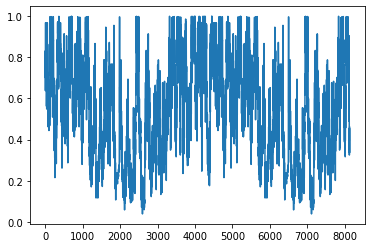

In [37]:
plt.plot(rolling_p_value)

In [112]:
rolling_statistic = []
rolling_p_value = []

for i in range(100, len(ts_df), 1):
  sub = ts_df.iloc[i-99:i,:]
  sub_t_test = stats.ttest_ind(sub['Log_Difference'], sub['crisis'])
  rolling_statistic.append(sub_t_test[0])
  rolling_p_value.append(sub_t_test[1])

fig1 = go.Figure([go.Scatter(name = 'CHF/EUR', x=index_dates, y=rolling_p_value)])

fig1.update_layout(
    xaxis_title="Date",
    yaxis_title="p-value",
    width=500,
    height=500,
    font = dict(
        size=25
    )
)

fig1.add_shape(
        type='line',
        x0=index_dates.min(),
        y0=0.05,
        x1=index_dates.max(),
        y1=0.05,
        line=dict(
            color='Red',
        )
)

fig1.show()

In [113]:
rolling_statistic = []
rolling_p_value = []

for i in range(100, len(ts_df), 1):
  sub = ts_df.iloc[i-99:i,:]
  sub_t_test = stats.ttest_ind(sub['Log_Difference'], sub['financial crisis'])
  rolling_statistic.append(sub_t_test[0])
  rolling_p_value.append(sub_t_test[1])

fig1 = go.Figure([go.Scatter(name = 'CHF/EUR', x=index_dates, y=rolling_p_value)])

fig1.update_layout(
    xaxis_title="Date",
    yaxis_title="p-value",
    width=500,
    height=500,
    font = dict(
        size=25
    )
)

fig1.add_shape(
        type='line',
        x0=index_dates.min(),
        y0=0.05,
        x1=index_dates.max(),
        y1=0.05,
        line=dict(
            color='Red',
        )
)

fig1.show()

In [114]:
rolling_statistic = []
rolling_p_value = []

for i in range(100, len(ts_df), 1):
  sub = ts_df.iloc[i-99:i,:]
  sub_t_test = stats.ttest_ind(sub['Log_Difference'], sub['leverage'])
  rolling_statistic.append(sub_t_test[0])
  rolling_p_value.append(sub_t_test[1])

fig1 = go.Figure([go.Scatter(name = 'CHF/EUR', x=index_dates, y=rolling_p_value)])

fig1.update_layout(
    xaxis_title="Date",
    yaxis_title="p-value",
    width=500,
    height=500,
    font = dict(
        size=25
    )
)

fig1.add_shape(
        type='line',
        x0=index_dates.min(),
        y0=0.05,
        x1=index_dates.max(),
        y1=0.05,
        line=dict(
            color='Red',
        )
)

fig1.show()

In [115]:
rolling_statistic = []
rolling_p_value = []

for i in range(100, len(ts_df), 1):
  sub = ts_df.iloc[i-99:i,:]
  sub_t_test = stats.ttest_ind(sub['Log_Difference'], sub['uncertainty'])
  rolling_statistic.append(sub_t_test[0])
  rolling_p_value.append(sub_t_test[1])

fig1 = go.Figure([go.Scatter(name = 'CHF/EUR', x=index_dates, y=rolling_p_value)])

fig1.update_layout(
    xaxis_title="Date",
    yaxis_title="p-value",
    width=500,
    height=500,
    font = dict(
        size=25
    )
)

fig1.add_shape(
        type='line',
        x0=index_dates.min(),
        y0=0.05,
        x1=index_dates.max(),
        y1=0.05,
        line=dict(
            color='Red',
        )
)

fig1.show()

In [15]:
t_test = stats.ttest_ind(ts_df['Log_Difference'], ts_df['swiss franc'])
t_test

Ttest_indResult(statistic=-1.5061782797954562, pvalue=0.1320556195701399)